# Plot AR6 regions

In [10]:
# Import functions
import warnings 
warnings.filterwarnings('ignore')
import os
import iris
import iris.cube
import cf_units
import numpy as np
import numpy.ma as ma
import xarray as xr
import regionmask
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
from matplotlib.gridspec import GridSpec
import matplotlib.patheffects as pe

## Load reference regions

In [11]:
ar6_land = regionmask.defined_regions.ar6.land

In [12]:
north_america = ar6_land[range(9)]
south_america = ar6_land[range(9, 16)]
europe = ar6_land[range(16, 20)]
africa = ar6_land[range(20, 28)]
asia = ar6_land[range(28, 39)]
australia = ar6_land[(range(39, 44))]
antarctica = ar6_land[range(44,46)]

continents = [north_america, south_america, europe, africa, asia, australia, antarctica]
colors = ['darkorange', 'red', 'purple', 'forestgreen', 'deepskyblue', 'navy', 'magenta']

In [13]:
params = {'legend.fontsize': 20,
          'axes.labelsize': 30,
          'axes.titlesize': 35,
          'axes.linewidth': 8,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'xtick.major.size': 8,
          'ytick.major.size': 8,
          'axes.grid': True}

plt.rcParams.update(params)

def autosize_figure(nrows, ncolumns, scale_factor=1, xscale_factor=1, yscale_factor=1):
    xwidth = (ncolumns+0.67) * 5.0 * scale_factor * xscale_factor
    ylength = (nrows+0.67) * 3.6 * scale_factor * yscale_factor
    return (xwidth, ylength)

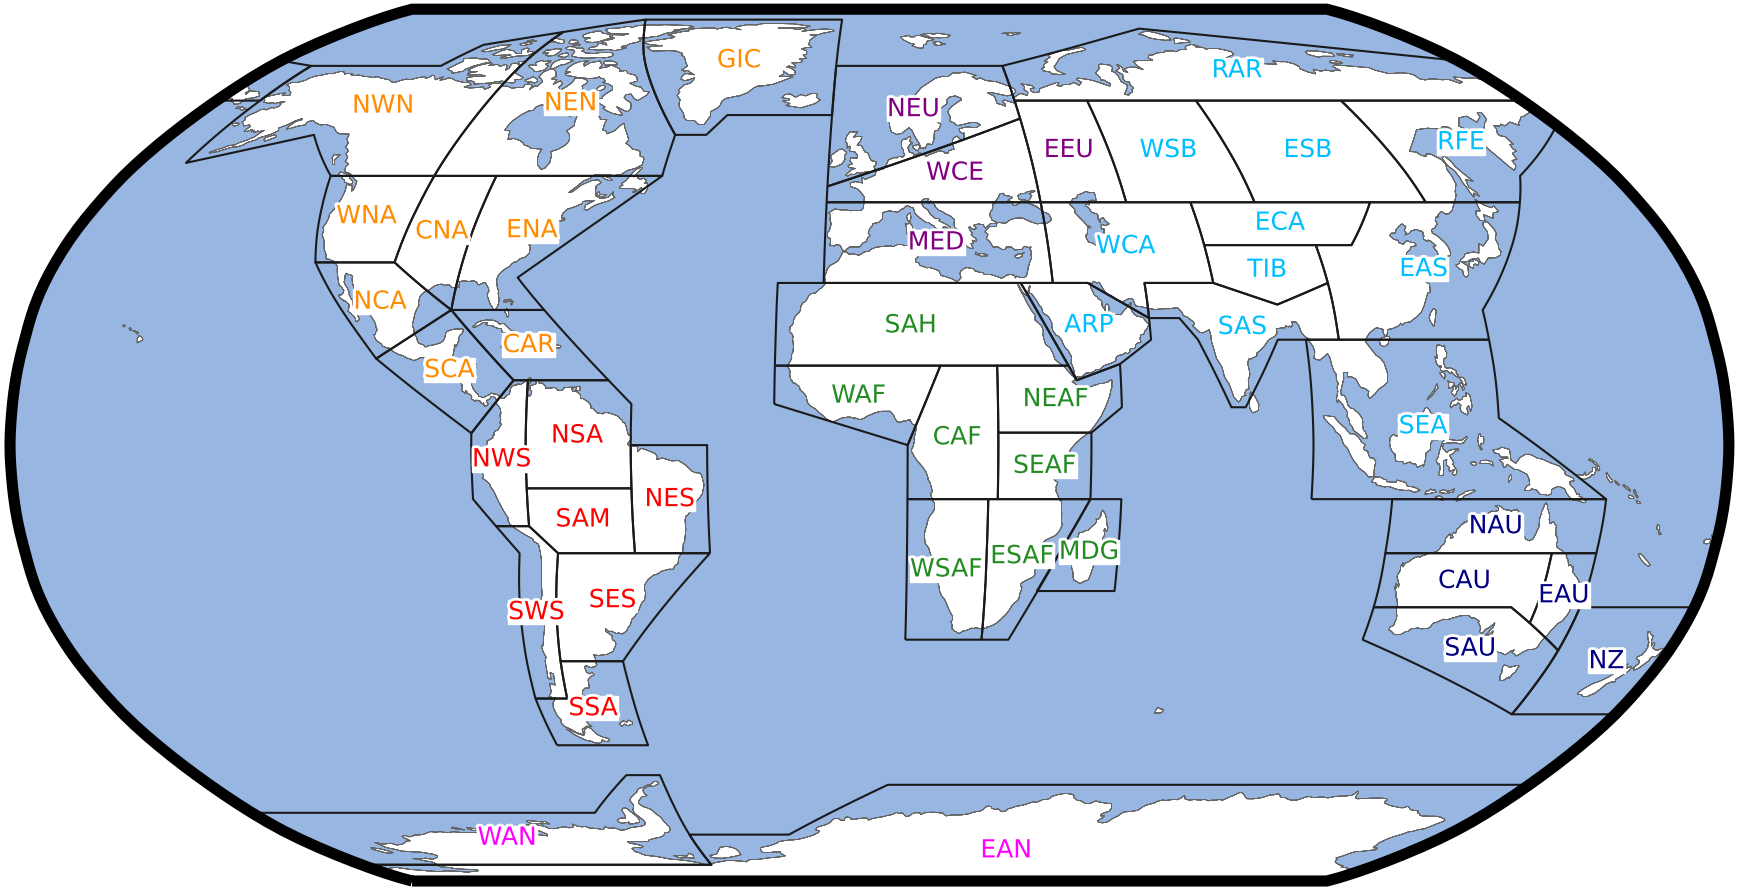

In [19]:
f, ax = plt.subplots(figsize=autosize_figure(1, 1, scale_factor=1.5, xscale_factor=1.5), subplot_kw=dict(projection=ccrs.Robinson()))

for i in range(7):
    text_kws = dict(color=colors[i], fontsize=18, bbox=dict(pad=0.2, color="w"), path_effects=[pe.withStroke(linewidth=4, foreground="w")],)
    ax = continents[i].plot(ax=ax, label='abbrev', add_ocean=True, text_kws=text_kws)

ax.set_global()

plt.tight_layout()
plt.savefig('/net/home/h05/awells/PycharmProjects/G6_comparison/Plots/Wells2023/Figure1.png', dpi=200)